In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.metrics import structural_similarity as ssim
import numpy as np

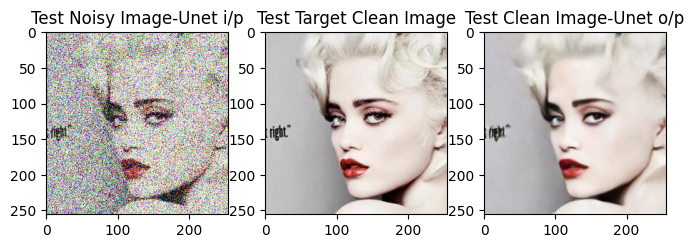

In [2]:
plt.figure(figsize=(8,8))
img4 = mpimg.imread("/home/data/taha/UNET-denoising/clean_task_unet_denoising/testing_single_image/testnoisyimagebeforeunet.jpg")
img5 = mpimg.imread("/home/data/taha/UNET-denoising/clean_task_unet_denoising/testing_single_image/testtargetcleanimage.jpg")
img6 = mpimg.imread("/home/data/taha/UNET-denoising/clean_task_unet_denoising/testing_single_image/testcleanimageafterunet.jpg")
plt.subplot(1,3,1).set_title("Test Noisy Image-Unet i/p")
plt.imshow(img4)
plt.subplot(1,3,2).set_title("Test Target Clean Image")
plt.imshow(img5)
plt.subplot(1,3,3).set_title("Test Clean Image-Unet o/p")
plt.imshow(img6)
plt.show()

In [11]:
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # MSE is zero means no noise, so PSNR is infinite
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

def calculate_ssim(img1, img2):
    # SSIM on color images
    return ssim(img1, img2, data_range=img2.max() - img2.min(), channel_axis=-1) # data_range=img2.max() - img2.min() ensures SSIM scales correctly for 8-bit images. channel_axis=-1 ensures SSIM is calculated across channels for color images.

In [12]:
print(img5.min())
print(img5.max())

print(img6.min())
print(img6.max())

0
255
0
255


In [13]:
print(f"Image 1 shape: {img5.shape}")
print(f"Image 2 shape: {img6.shape}")

Image 1 shape: (256, 256, 3)
Image 2 shape: (256, 256, 3)


PSNR: A value in decibels (dB). Higher is better. \
SSIM: A value between 0 and 1. Closer to 1 means better structural similarity.

In [14]:
# Compute PSNR and SSIM
psnr_value = calculate_psnr(img5, img6)
ssim_value = calculate_ssim(img5, img6)

print(f"PSNR: {psnr_value:.2f} dB")
print(f"SSIM: {ssim_value:.4f}")

PSNR: 32.60 dB
SSIM: 0.8638
